In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data1=pd.read_csv("/content/churn_prediction.csv")
data1.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [5]:
data1.shape

(28382, 21)

In [6]:
data1.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [7]:
data1.describe()
#For Continuos Variable (BOX CAR PLOT- min%,25,50,75,max%)

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [8]:
data1.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


In [9]:
data1['vintage'].describe()

count    28382.000000
mean      2364.336446
std       1610.124506
min        180.000000
25%       1121.000000
50%       2018.000000
75%       3176.000000
max      12899.000000
Name: vintage, dtype: float64

In [10]:
data1.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [11]:
data1.nunique()

customer_id                       28382
vintage                            5473
age                                  90
gender                                2
dependents                           15
occupation                            5
city                               1604
customer_nw_category                  3
branch_code                        3185
days_since_last_transaction         360
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
dtype: int64

In [12]:
data1['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

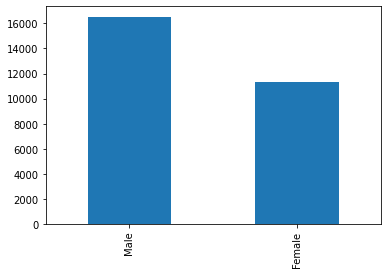

In [13]:
data1['gender'].value_counts().plot( kind="bar")

In [14]:
data1['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

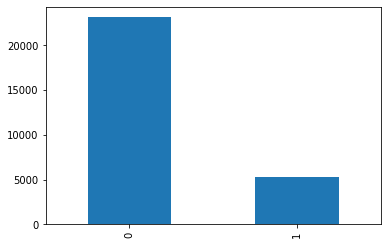

In [15]:
data1['churn'].value_counts().plot(kind='bar')

# Dealing With Missing Values for continuos as well as categorical variable

Categorical Variables- 'gender'(object) & 'occupation'(object)
used get_dummies (One Hot Encoding Technique)

In [17]:
data1= pd.get_dummies(data1)
data1.head(10)

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,187.0,2,755,224.0,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0.0,NaN,2,3214,60.0,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.0,2,41,NaN,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,NaN,1020.0,2,582,147.0,2291.91,2291.91,...,2291.91,1669.79,1,0,0,0,0,0,1,0
4,6,2531,42,2.0,1494.0,3,388,58.0,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0
5,7,263,42,0.0,1096.0,2,1666,60.0,15202.20,16059.34,...,15719.44,15349.75,0,1,0,0,0,0,1,0
6,8,5922,72,0.0,1020.0,1,1,98.0,7006.93,7714.19,...,7076.06,7755.98,0,0,1,0,1,0,0,0
7,9,1145,46,0.0,623.0,2,317,172.0,10096.58,8519.53,...,8563.84,5317.04,0,0,1,0,0,0,1,0
8,10,2132,31,0.0,1096.0,2,4110,19.0,1355.86,1355.86,...,1183.45,1857.42,0,0,1,0,0,1,0,0
9,11,3379,40,3.0,1020.0,2,38,0.0,4957.95,4244.38,...,1823.16,2416.69,0,0,1,0,0,0,1,0


In [18]:
data1.isnull().sum()
##occupation and genders don't have missing values now

customer_id                          0
vintage                              0
age                                  0
dependents                        2463
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
gender_Female                        0
gender_Male                          0
occupation_company                   0
occupation_retired                   0
occupation_salaried                  0
occupation_self_employed             0
occupation_student       

Continuos Variable- 'dependents'(float64)

In [19]:
data1['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

In [20]:
median_val1=data1['dependents'].median()
median_val1

0.0

In [21]:
data1['dependents']=data1['dependents'].fillna(value='0')

In [22]:
data1.head(10)

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,187.0,2,755,224.0,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0.0,NaN,2,3214,60.0,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.0,2,41,NaN,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,0,1020.0,2,582,147.0,2291.91,2291.91,...,2291.91,1669.79,1,0,0,0,0,0,1,0
4,6,2531,42,2.0,1494.0,3,388,58.0,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0
5,7,263,42,0.0,1096.0,2,1666,60.0,15202.20,16059.34,...,15719.44,15349.75,0,1,0,0,0,0,1,0
6,8,5922,72,0.0,1020.0,1,1,98.0,7006.93,7714.19,...,7076.06,7755.98,0,0,1,0,1,0,0,0
7,9,1145,46,0.0,623.0,2,317,172.0,10096.58,8519.53,...,8563.84,5317.04,0,0,1,0,0,0,1,0
8,10,2132,31,0.0,1096.0,2,4110,19.0,1355.86,1355.86,...,1183.45,1857.42,0,0,1,0,0,1,0,0
9,11,3379,40,3.0,1020.0,2,38,0.0,4957.95,4244.38,...,1823.16,2416.69,0,0,1,0,0,0,1,0


In [23]:
data1.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
dependents                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
gender_Female                        0
gender_Male                          0
occupation_company                   0
occupation_retired                   0
occupation_salaried                  0
occupation_self_employed             0
occupation_student       

Continuos Variable- 'city'(float64)

In [24]:
mean_val1=data1['city'].mean()
mean_val1

796.1095761267632

In [25]:
data1['city']=data1['city'].fillna(value=mean_val1)
data1.head(10)

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,187.000000,2,755,224.0,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0.0,796.109576,2,3214,60.0,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.000000,2,41,NaN,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,0,1020.000000,2,582,147.0,2291.91,2291.91,...,2291.91,1669.79,1,0,0,0,0,0,1,0
4,6,2531,42,2.0,1494.000000,3,388,58.0,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0
5,7,263,42,0.0,1096.000000,2,1666,60.0,15202.20,16059.34,...,15719.44,15349.75,0,1,0,0,0,0,1,0
6,8,5922,72,0.0,1020.000000,1,1,98.0,7006.93,7714.19,...,7076.06,7755.98,0,0,1,0,1,0,0,0
7,9,1145,46,0.0,623.000000,2,317,172.0,10096.58,8519.53,...,8563.84,5317.04,0,0,1,0,0,0,1,0
8,10,2132,31,0.0,1096.000000,2,4110,19.0,1355.86,1355.86,...,1183.45,1857.42,0,0,1,0,0,1,0,0
9,11,3379,40,3.0,1020.000000,2,38,0.0,4957.95,4244.38,...,1823.16,2416.69,0,0,1,0,0,0,1,0


In [26]:
data1.isnull().sum()
# No missing values for 'city'

customer_id                          0
vintage                              0
age                                  0
dependents                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
gender_Female                        0
gender_Male                          0
occupation_company                   0
occupation_retired                   0
occupation_salaried                  0
occupation_self_employed             0
occupation_student       

Continuos Variable- 'days_since_last_transaction'(float64)

In [ ]:
#data1['current_month_debit','current_month_credit']
#Converted float 64 data types into int 64
#data1['current_month_debit'] = data1.current_month_debit.astype('int64')
#data1['current_month_credit'] = data1.current_month_credit.astype('int64')

# We will not do this conversion as after applying our logic of 29 days the isnull() value counts more 
# Using it isnull() gives 2582 otherwise 2576


In [27]:
#data1.loc[(data1['current_month_debit'] >1.0) & (data1['days_since_last_transaction'].isnull()),'days_since_last_transaction']= 29
data1.loc[(data1['current_month_credit']>1.0) & (data1['days_since_last_transaction'].isnull()),'days_since_last_transaction']= 29


In [28]:
data1.loc[(data1['current_month_debit'] >1.0) & (data1['days_since_last_transaction'].isnull()),'days_since_last_transaction']= 29
data1.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,187.000000,2,755,224.0,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0.0,796.109576,2,3214,60.0,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.000000,2,41,29.0,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,0,1020.000000,2,582,147.0,2291.91,2291.91,...,2291.91,1669.79,1,0,0,0,0,0,1,0
4,6,2531,42,2.0,1494.000000,3,388,58.0,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0


In [29]:
data1.isnull().sum()
# Null values of 'days_since_last_transaction' reduces from 3223 to 2576

customer_id                          0
vintage                              0
age                                  0
dependents                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       2576
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
gender_Female                        0
gender_Male                          0
occupation_company                   0
occupation_retired                   0
occupation_salaried                  0
occupation_self_employed             0
occupation_student       

In [ ]:
# Now Further, Null values in 'days_since_last_transaction' can be reduced again for looking previous months' credit & debits

In [31]:
data1.loc[(data1['previous_month_credit']>1.0) & (data1['days_since_last_transaction'].isnull()),'days_since_last_transaction']= 56


In [32]:
data1.loc[(data1['previous_month_debit'] >1.0) & (data1['days_since_last_transaction'].isnull()),'days_since_last_transaction']= 56
data1.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,187.000000,2,755,224.0,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0.0,796.109576,2,3214,60.0,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.000000,2,41,29.0,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,0,1020.000000,2,582,147.0,2291.91,2291.91,...,2291.91,1669.79,1,0,0,0,0,0,1,0
4,6,2531,42,2.0,1494.000000,3,388,58.0,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0


In [33]:
data1.isnull().sum()
# Null values of 'days_since_last_transaction' reduces from 2576 to 2280

customer_id                          0
vintage                              0
age                                  0
dependents                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       2280
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
gender_Female                        0
gender_Male                          0
occupation_company                   0
occupation_retired                   0
occupation_salaried                  0
occupation_self_employed             0
occupation_student       

In [ ]:
# Now Further, Null values in 'days_since_last_transaction' can be reduced again for looking difference between 
# current months' balance and previous months' balance

In [34]:

data1.loc[(abs(data1['previous_month_end_balance']-data1['current_month_balance'])>=10) & (data1['days_since_last_transaction'].isnull()) , 'days_since_last_transaction'] = 28

In [35]:
data1.loc[(abs(data1['previous_month_balance']-data1['current_month_balance'])>=10) & (data1['days_since_last_transaction'].isnull()) , 'days_since_last_transaction'] = 28

In [36]:
data1.isnull().sum()
# Null values of 'days_since_last_transaction' reduces from 2280 to 1800

customer_id                          0
vintage                              0
age                                  0
dependents                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       1800
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
gender_Female                        0
gender_Male                          0
occupation_company                   0
occupation_retired                   0
occupation_salaried                  0
occupation_self_employed             0
occupation_student       

In [ ]:
# Now Further, Null values in 'days_since_last_transaction' can be reduced again by looking down for mean

In [37]:
mean_val2=data1['days_since_last_transaction'].mean()
mean_val2

68.08569708825522

In [38]:
data1['days_since_last_transaction']=data1['days_since_last_transaction'].fillna(value=mean_val2)

In [39]:
data1.isnull().sum()
# No missing value left

customer_id                       0
vintage                           0
age                               0
dependents                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
gender_Female                     0
gender_Male                       0
occupation_company                0
occupation_retired                0
occupation_salaried               0
occupation_self_employed          0
occupation_student                0
dtype: int64

In [ ]:
data1.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0,187.000000,2,755,224.0,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0,796.109576,2,3214,60.0,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0,146.000000,2,41,29.0,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,0,1020.000000,2,582,147.0,2291.91,2291.91,...,2291.91,1669.79,1,0,0,0,0,0,1,0
4,6,2531,42,2,1494.000000,3,388,58.0,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0


# Seperating independent, dependent variable & Splitting them into training and testing set

In [40]:
x= data1.drop(['churn'],axis=1)
x

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,187.000000,2,755,224.000000,1458.71,1458.71,...,0.20,1458.71,1458.71,0,1,0,0,0,1,0
1,2,310,35,0.0,796.109576,2,3214,60.000000,5390.37,8704.66,...,100.56,6496.78,8787.61,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.000000,2,41,29.000000,3913.16,5815.29,...,259.23,5006.28,5070.14,0,1,0,0,1,0,0
3,5,478,90,0,1020.000000,2,582,147.000000,2291.91,2291.91,...,2143.33,2291.91,1669.79,0,0,0,0,0,1,0
4,6,2531,42,2.0,1494.000000,3,388,58.000000,927.72,1401.72,...,1538.06,1157.15,1677.16,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,0.0,1020.000000,2,1207,70.000000,1076.43,1076.43,...,0.30,1076.43,1076.43,1,0,0,0,0,0,1
28378,30298,4919,34,0.0,1046.000000,2,223,14.000000,3844.10,4069.21,...,1014.07,3738.54,3690.32,1,0,0,0,0,1,0
28379,30299,297,47,0.0,1096.000000,2,588,0.000000,65511.97,61017.55,...,71.80,61078.50,57564.24,0,1,0,0,1,0,0
28380,30300,2585,50,3.0,1219.000000,3,274,68.085697,1625.55,1625.55,...,0.20,1625.55,1625.55,0,1,0,0,0,1,0


In [42]:
#x= data1.drop(['customer_id'], axis=1)
x= x.iloc[:,1:]  #.values
y= data1['churn']   #.values

In [43]:
x

,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,66,0.0,187.000000,2,755,224.000000,1458.71,1458.71,1458.71,1449.07,...,0.20,1458.71,1458.71,0,1,0,0,0,1,0
1,35,0.0,796.109576,2,3214,60.000000,5390.37,8704.66,7799.26,12419.41,...,100.56,6496.78,8787.61,0,1,0,0,0,1,0
2,31,0.0,146.000000,2,41,29.000000,3913.16,5815.29,4910.17,2815.94,...,259.23,5006.28,5070.14,0,1,0,0,1,0,0
3,90,0,1020.000000,2,582,147.000000,2291.91,2291.91,2084.54,1006.54,...,2143.33,2291.91,1669.79,0,0,0,0,0,1,0
4,42,2.0,1494.000000,3,388,58.000000,927.72,1401.72,1643.31,1871.12,...,1538.06,1157.15,1677.16,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,10,0.0,1020.000000,2,1207,70.000000,1076.43,1076.43,2282.19,2787.70,...,0.30,1076.43,1076.43,1,0,0,0,0,0,1
28378,34,0.0,1046.000000,2,223,14.000000,3844.10,4069.21,3668.83,3865.55,...,1014.07,3738.54,3690.32,1,0,0,0,0,1,0
28379,47,0.0,1096.000000,2,588,0.000000,65511.97,61017.55,53444.81,21925.81,...,71.80,61078.50,57564.24,0,1,0,0,1,0,0
28380,50,3.0,1219.000000,3,274,68.085697,1625.55,1625.55,1683.20,1857.42,...,0.20,1625.55,1625.55,0,1,0,0,0,1,0


In [44]:
y

0        0
1        0
2        0
3        1
4        1
        ..
28377    0
28378    0
28379    1
28380    0
28381    1
Name: churn, Length: 28382, dtype: int64

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scale1=MinMaxScaler()
#x= scale1.fit_transform(x)
#temp=pd.DataFrame(x[:,:])
#temp.head()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=51, stratify=y)
# test_size=0.20

In [47]:
y_train
#It is an numpy array

22286    0
19786    0
17779    0
11375    0
25316    0
        ..
11971    0
13486    1
21542    0
18486    0
2380     0
Name: churn, Length: 21286, dtype: int64

In [48]:
print(np.count_nonzero(y_train == 1)/len(y_train))
print(np.count_nonzero(y_train == 0)/len(y_train))

0.1853330827774124
0.8146669172225877


In [49]:
print(np.count_nonzero(y_test == 1)/len(y_test))
print(np.count_nonzero(y_test == 0)/len(y_test))

0.18531567080045097
0.814684329199549


In [50]:
# OR
import collections
collections.Counter(y_train)
#y_train.value_counts()/len(y_train)

#" value_counts is used with pandas not with numpy arrays "


Counter({0: 17341, 1: 3945})

In [51]:
collections.Counter(y_test)
#y_test.value_counts()/len(y_test)

Counter({1: 1315, 0: 5781})

# Implementing Classification Models and then an ensemble Model to check for best accuracy score

In [52]:
#1- Logistic Regresssion
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=100)
LR.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
pred1=LR.predict(x_test)
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [3]:
from sklearn.metrics import accuracy_score

In [55]:
A=accuracy_score(y_test,pred1)
A

0.8252536640360767

In [56]:
from sklearn.metrics import classification_report
rep1=classification_report(y_test,pred1)
print(rep1)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5781
           1       0.69      0.10      0.18      1315

    accuracy                           0.83      7096
   macro avg       0.76      0.55      0.54      7096
weighted avg       0.80      0.83      0.77      7096



In [57]:
LR.score(x_train,y_train)

0.8265056844874565

In [ ]:
#import 

In [58]:
confusion_matrix(y, y_pred)

NameError: ignored

In [59]:
#2- KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
KN= KNeighborsClassifier()
KN.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
pred2=KN.predict(x_test)
pred2

array([0, 0, 0, ..., 1, 0, 0])

In [63]:
B=accuracy_score(y_test,pred2)
B

0.8485062006764374

In [64]:
from sklearn.metrics import classification_report
rep2=classification_report(y_test, pred2)
print(rep2)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5781
           1       0.64      0.41      0.50      1315

    accuracy                           0.85      7096
   macro avg       0.76      0.68      0.71      7096
weighted avg       0.83      0.85      0.83      7096



In [65]:
KN.score(x_train,y_train)

0.8810485765291741

In [66]:
#3- Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(max_depth=10)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [67]:
pred3=clf.predict(x_test)
pred3

array([0, 0, 0, ..., 1, 0, 0])

In [68]:
C=accuracy_score(y_test,pred3)
C

0.8458286358511837

In [69]:
from sklearn.metrics import classification_report
rep3= classification_report(y_test,pred3)
print(rep3)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5781
           1       0.62      0.44      0.52      1315

    accuracy                           0.85      7096
   macro avg       0.75      0.69      0.71      7096
weighted avg       0.83      0.85      0.84      7096



In [70]:
clf.score(x_train,y_train)

0.9067462181715682

In [71]:
clf.score(x_test,y_test)

0.8458286358511837

In [72]:
#4- Ensemble Model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=10,n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [73]:
pred4= rf.predict(x_test)
pred4

array([0, 0, 0, ..., 1, 0, 0])

In [74]:
D=accuracy_score(y_test,pred4)
D

0.8607666290868095

In [75]:
from sklearn.metrics import classification_report
rep4=classification_report(y_test,pred4)
print(rep4)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      5781
           1       0.74      0.39      0.51      1315

    accuracy                           0.86      7096
   macro avg       0.81      0.68      0.71      7096
weighted avg       0.85      0.86      0.84      7096



In [76]:
rf.score(x_train,y_train)

0.9001221460114629

In [77]:
rf.score(x_test,y_test)

0.8607666290868095

In [78]:
rf.feature_importances_

array([2.15412429e-02, 5.19136837e-03, 2.11576624e-02, 7.60387514e-03,
       2.67356512e-02, 2.63685331e-02, 2.93207105e-01, 6.35714101e-02,
       5.27238029e-02, 5.10860248e-02, 3.67920762e-02, 3.53556767e-02,
       1.07354976e-01, 6.77519588e-02, 1.17518246e-01, 5.19681229e-02,
       2.70043905e-03, 2.56278199e-03, 1.86481458e-05, 1.38930767e-03,
       2.86517144e-03, 3.07728221e-03, 1.45863599e-03])

In [79]:
pd.Series(rf.feature_importances_, index=x_train.columns)

age                               0.021541
dependents                        0.005191
city                              0.021158
customer_nw_category              0.007604
branch_code                       0.026736
days_since_last_transaction       0.026369
current_balance                   0.293207
previous_month_end_balance        0.063571
average_monthly_balance_prevQ     0.052724
average_monthly_balance_prevQ2    0.051086
current_month_credit              0.036792
previous_month_credit             0.035356
current_month_debit               0.107355
previous_month_debit              0.067752
current_month_balance             0.117518
previous_month_balance            0.051968
gender_Female                     0.002700
gender_Male                       0.002563
occupation_company                0.000019
occupation_retired                0.001389
occupation_salaried               0.002865
occupation_self_employed          0.003077
occupation_student                0.001459
dtype: floa

# ANN- First, used feature scaling and then applied ann

In [80]:
x_train

,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
22286,71,0.0,146.0,1,1753,73.0,1887.91,1887.91,1728.30,1165.18,...,0.03,1887.91,1887.91,1,0,0,0,0,1,0
19786,48,1.0,904.0,3,596,55.0,18229.65,18648.08,18868.84,17541.88,...,833.40,18384.34,18899.57,0,1,0,0,0,1,0
17779,27,0.0,187.0,3,2815,0.0,15022.44,13929.52,13656.43,3461.66,...,6.26,13939.21,13942.63,0,1,0,0,0,1,0
11375,45,0.0,1020.0,1,80,12.0,8015.21,9483.42,9096.76,6490.82,...,11.63,9194.43,9422.08,1,0,0,0,0,1,0
25316,32,0,15.0,1,971,55.0,3360.73,3389.30,3413.71,2789.50,...,261.73,3374.52,3600.68,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,62,0.0,1020.0,2,835,297.0,1966.10,1966.10,1966.10,2473.17,...,0.51,1966.10,1966.10,0,1,0,1,0,0,0
13486,23,0.0,623.0,2,317,30.0,9.73,9.73,1819.49,5113.12,...,3628.73,877.71,1091.76,0,1,0,0,0,0,1
21542,59,0.0,834.0,3,718,53.0,2032.34,2032.34,7039.89,7743.52,...,12861.25,2032.34,4871.21,1,0,0,0,0,1,0
18486,24,0.0,409.0,3,391,33.0,12032.68,11895.59,10613.25,6259.83,...,0.14,12009.04,10197.27,1,0,0,0,0,0,1


In [81]:
x_test

,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
14749,60,0,1046.0,3,2451,12.000000,2912.39,5698.39,2353.11,654.25,...,8572.82,3120.65,3726.36,0,1,0,0,0,1,0
14559,40,0.0,409.0,3,483,17.000000,2056.22,3067.05,3340.84,2363.18,...,5543.85,2585.79,3297.00,0,1,0,0,1,0,0
4977,30,0.0,371.0,2,316,18.000000,1300.99,6442.66,3934.68,1728.95,...,182.77,5619.64,4430.43,0,1,0,0,1,0,0
16840,48,0.0,15.0,3,69,68.085697,2292.47,2292.47,2292.47,2277.94,...,0.29,2292.47,2292.47,0,1,0,0,0,1,0
8408,90,0.0,1020.0,2,1451,171.000000,2110.91,2110.91,2110.91,2097.40,...,0.64,2110.91,2110.91,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24925,56,0.0,621.0,3,8,294.000000,1860.28,1860.28,1940.28,2120.92,...,0.56,1860.28,1860.28,1,0,0,0,0,1,0
1186,90,0.0,991.0,3,1912,68.085697,88516.64,88516.64,88726.49,101320.62,...,0.16,88516.64,88516.64,0,1,0,0,0,0,0
16889,58,0.0,1020.0,2,542,63.000000,412.20,442.61,1830.79,4393.81,...,1504.26,562.03,2987.91,0,1,0,0,0,1,0
21520,53,1.0,1181.0,2,235,56.000000,8752.50,8723.25,8624.55,8702.42,...,250.64,8735.25,8644.50,0,1,0,0,1,0,0


In [82]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()
x_train= scl.fit_transform(x_train)
x_test = scl.transform(x_test)

## Building The ANN

In [83]:
import tensorflow as tf

In [84]:
# Initialise the ANN
ann= tf.keras.models.Sequential()

In [93]:
# Adding the Input Layer & First Hidden Layer # 'keras' is a library', 'Layers' is a module, 'Dense' is a Class which takes 
# arguements just like any other class.
# 'units'= No. of hidden neurons in the first hidden layer not in the input layer as we automatically have neurons as no. of 
# features used in dataset, 'relu' for rectifier activation function.
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [86]:
# Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [92]:
#For Output Layer
# units= 1 becoz here only 0 or 1 is the possibility,for example-if it were like A,B,C then units must = 3(A-001, B-010, C-100)
# sigmoid for output layer as it will also give you probabilities for the prediction.
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Compiling th ANN

In [88]:
ann.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'] )

## Training

In [89]:
ann.fit(x_train,y_train,batch_size=32 ,epochs=100 )

Epoch 1/100
666/666 [==============================] - 3s 3ms/step - loss: 0.5383 - accuracy: 0.7770
Epoch 2/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4725 - accuracy: 0.8136
Epoch 3/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4651 - accuracy: 0.8143
Epoch 4/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4593 - accuracy: 0.8145
Epoch 5/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4544 - accuracy: 0.8148
Epoch 6/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4500 - accuracy: 0.8159
Epoch 7/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4460 - accuracy: 0.8165
Epoch 8/100
666/666 [==============================] - 2s 3ms/step - loss: 0.4423 - accuracy: 0.8178
Epoch 9/100
666/666 [==============================] - 2s 3ms/step - loss: 0.4388 - accuracy: 0.8183
Epoch 10/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4351 - accura

In [95]:
pred_5= ann.predict(x_test)
pred_5

222/222 [==============================] - 0s 1ms/step


array([[0.21453984],
       [0.42168793],
       [0.4828352 ],
       ...,
       [0.6164267 ],
       [0.02913295],
       [0.18155329]], dtype=float32)

In [100]:
# above predictions needs to get converted into boolean with threshold
pred_5= (pred_5 > 0.5)

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix 
accuracy_score(y_test, pred_5)


0.8679537767756482

In [102]:
confusion_matrix(y_test, pred_5)

array([[5529,  252],
       [ 685,  630]])

In [4]:
# accuracy_score= (TP+FN)/(Total no of rows in input)

In [ ]:
#data1.loc[data1['current_month_debit'] > 10, data1['days_since_last_transaction'].fillna() = 'False' 

#df.loc[df['set_of_numbers'] == 0, 'set_of_numbers'] = 999
#data1.loc[data1['days_since_last_transaction'].isnull(), 'days_since_last_transaction'] = 0


In [ ]:
#if 'current_month_debit'>=10.0 or 'current_month_credit'>=1.0 in data1.columns:
#    data1['days_since_last_transaction']=data1['days_since_last_transaction'].fillna(value=25)
#data1.head()

In [ ]:
#if data1[(data1['current_month_debit']>=10.0) | data1['current_month_credit']>=1.0 ]:
#    data1[data1['days_since_last_transaction'].fillna(value=25)]

In [ ]:
#df= data1[(data1['current_month_debit']>=10.0) | data1['current_month_credit']>=1.0 ]
#print(df)    
    #data1['days_since_last_transaction'].fillna(value=25).head()

In [ ]:
#df['current_month_debit'].head()

In [ ]:
#if data1[(data1['current_month_debit']>=10.0) | data1['current_month_credit']>=1.0]:
#    df['days_since_last_transaction'].fillna(value=25)

In [ ]:
#data1['gender'].head()
#data1.dtypes
#data1['gender'].value_counts()

#data1['gender']= pd.get_dummies(data1['gender'])
#data1.head(10)
### All the missing values have been converted to 1 which in general is used here for (MALE), in other words missing values
## have been imputed as MALES(which is Mode in this case as frequency of MALE category is more).

#data1['gender'].value_counts()

#data1.isnull().sum()
## No missing values for gender

In [ ]:
#Continuos Variable- 'dependents'(float64)

In [ ]:
#data1['dependents'].value_counts()
#median_val1=data1['dependents'].median()
#median_val1
#data1['dependents']=data1['dependents'].fillna(value='0')

#data1.isnull().sum()
## No missing value for dependents

In [ ]:
#data1= pd.get_dummies(data1)
#data1.head(10)

In [ ]:
#data1['occupation'].value_counts()

In [ ]:
data1['occupation']=pd.get_dummies(data1['occupation'])

In [ ]:
data1.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0,1,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,0,0,1,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,0,0,1,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,0,0,1,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,0,2,1,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [ ]:
data1['gender'] = data1.gender.astype('category')

In [ ]:
mode_val=data1['gender'].mode()
mode_val

0    Male
Name: gender, dtype: category
Categories (2, object): [Female, Male]

In [ ]:
#data1['gender']=
#(data1['gender'],dtype= 'category')

In [ ]:
if(data1['gender']=='Male')
    

In [ ]:
data1['gender'] = data1['gender'].fillna(mode_val,inplace=False)

In [ ]:
data1['gender'].head()

0    Male
1    Male
2    Male
3     NaN
4    Male
Name: gender, dtype: category
Categories (2, object): [Female, Male]